In [2]:
import pandas as pd
import requests
import json
import seaborn as sns

This is a dataset for all of the asteroids/meteroids that passed by earth in the first week of 2019. Unfortunately NASA only allows pulling 7 days at a time.

In [3]:
#Read in data
nasa_url = 'https://api.nasa.gov/neo/rest/v1/feed'
params = {'start_date':'2019-01-01', 'end_date':'2019-01-08', 'api_key':'MpTCw25yrnwutyba5P4fs660nFUiSPJpBKsu4hGa'}
nasa_req = requests.get(nasa_url, params=params)
nasa_all = json.loads(nasa_req.text)

Now that we have the data, we can see what's in it. First, we'll drill down to the near_earth_objects section. We'll look at a sample entry.

In [4]:
nasa = nasa_all['near_earth_objects']
nasa['2019-01-01'][1]

{'links': {'self': 'https://api.nasa.gov/neo/rest/v1/neo/3398652?api_key=MpTCw25yrnwutyba5P4fs660nFUiSPJpBKsu4hGa'},
 'id': '3398652',
 'neo_reference_id': '3398652',
 'name': '(2007 YQ56)',
 'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3398652',
 'absolute_magnitude_h': 19.9,
 'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.2783267681,
   'estimated_diameter_max': 0.6223575734},
  'meters': {'estimated_diameter_min': 278.3267680719,
   'estimated_diameter_max': 622.3575733667},
  'miles': {'estimated_diameter_min': 0.1729441822,
   'estimated_diameter_max': 0.3867149477},
  'feet': {'estimated_diameter_min': 913.1455937611,
   'estimated_diameter_max': 2041.8556210042}},
 'is_potentially_hazardous_asteroid': True,
 'close_approach_data': [{'close_approach_date': '2019-01-01',
   'epoch_date_close_approach': 1546329600000,
   'relative_velocity': {'kilometers_per_second': '15.4294873559',
    'kilometers_per_hour': '55546.1544811129',
    'miles_per_hour': '

The dataset is split out by day. We'll just look at the 8 NEOs that passed by on January 1st.

In [18]:
NEO = pd.DataFrame(index = range(8), columns = {'diameter', 'hazardous', 'velocity', 'miss_distance'})
for i in range(len(nasa['2019-01-01'])):
    NEO['diameter'][i] = float(nasa['2019-01-01'][i]['estimated_diameter']['meters']['estimated_diameter_max'])
    NEO['hazardous'][i] = nasa['2019-01-01'][i]['is_potentially_hazardous_asteroid']
    NEO['velocity'][i] = float(nasa['2019-01-01'][i]['close_approach_data'][0]['relative_velocity']['kilometers_per_hour'])
    NEO['miss_distance'][i] = float(nasa['2019-01-01'][i]['close_approach_data'][0]['miss_distance']['kilometers'])
NEO

,hazardous,velocity,miss_distance,diameter
0,False,23260.1,1.79876e+07,43.0566
1,True,55546.2,1.1441e+07,622.358
2,False,42187.1,1.02207e+07,85.9093
3,False,49114.6,7.03373e+07,411.188
4,False,29441.4,3.03341e+07,85.9093
5,False,30126.9,1.91084e+07,89.958
6,False,43435,5.72133e+07,156.329
7,False,19443.6,1.59691e+07,94.1976


This is the relative relationship between miss distance and velocity of the asteroid. The higher velocity, the more damage!

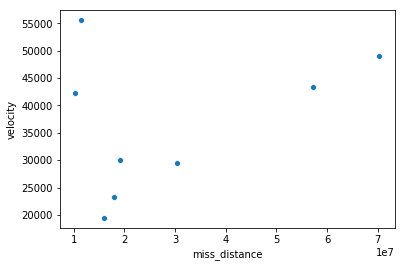

In [19]:
sns.scatterplot(x = 'miss_distance', y = 'velocity', data = NEO)

This is the relative relationship between miss distance and diameter of the asteroid. The larger the diameter, the more damage!

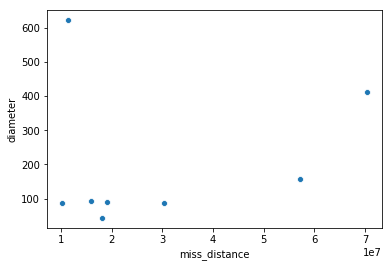

In [20]:
sns.scatterplot(x = 'miss_distance', y = 'diameter', data = NEO)